# The Best Neighborhood in Pittsburgh
## Introduction
To measure the best neighborhood in Pittsburgh, we used datasets from the WPRDC to determine different submetrics such as:
- Most Fun
- Safest
- Number of Parks
- Number of Playgrounds

Before settling on the final metric and submetric, we decided to come up with our own submetrics first and then figure out a common theme for a main metric after. Upon reflection, we found that all of our submetric could be related in some way to going outside. Being a computer science class, we thought it would be fitting to label this metric as "Touch Grass". It works within the constraints of the project since we were given permission to be "whimsical". 

## The Metric
We decided to measure by how much a neighborhood "touches grass" or rather, how encouraged residents are to touch grass given the neighborhood’s public resources and events available to them. Touching grass is important, because without it people can become antisocial with poor attitudes. It not only provides physical benefits from going outside, but also often involves interacting with others in the neighborhood which helps improve interpersonal relationships and community as a whole. This metric is important to us because we have personally seen the results of a lack of touching grass in our own community here at Pitt. 


## Data
#### Submetric 1 : Safest

Dataset shape: (72818, 20)

First few rows:
The Neighborhoods in our data:
['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' nan 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'Terrace Village' 'West Oakland' 'Fineview'
 'Perry South' 'Upper Lawrenceville' 'Bluff' 'Sheraden'
 'Spring Hill–City View' 'Bloomfield' 'Beechview' 'Squirrel Hill North'
 'Garfield' 'Banksville' 'Bon Air' 'Northview Heights' 'Overbrook'
 'Larimer' 'Hazelwood' 'Friendship' 'Central Northside' 'Homewood West'
 'Lower Lawrenceville' 'East Carnegie' 'Bedford Dwellings'
 

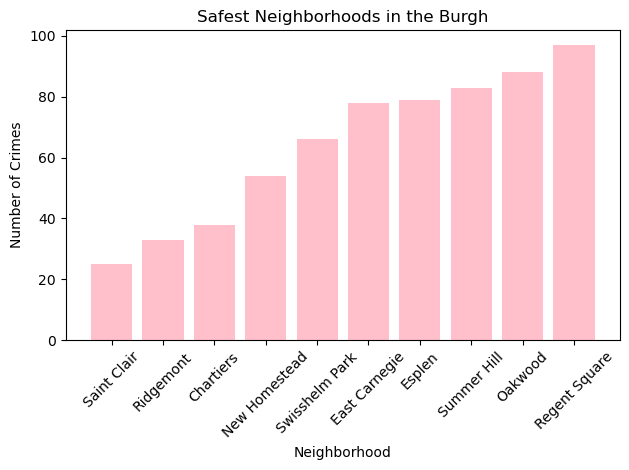

The Safest Neighborhood in Pittsburgh is: Saint Clair


In [6]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for charts
%matplotlib inline

# loading data set
resource_id = "bd41992a-987a-4cca-8798-fbe1cd946b07"
crime_url = f"https://data.wprdc.org/datastore/dump/{resource_id}"
crime_data = pd.read_csv(crime_url, low_memory=False)

# first look at data
print("Dataset shape:", crime_data.shape)
print("\nFirst few rows:")
crime_data.head()

# getting a feel for the data
print("The Neighborhoods in our data:")
print(crime_data['Neighborhood'].unique())

# how crimes happened in each neighborhood
crime_counts = crime_data['Neighborhood'].value_counts()

print("Crimes by Neighborhood:")
print(crime_counts)

# crimes per neighborhood
crime_counts = crime_data['Neighborhood'].value_counts()

print(f"\nWe have {len(crime_counts)} neighborhoods")
print(f"Crime counts range from {crime_counts.min()} tp {crime_counts.max()}")

# finding out the safest neighborhoods

safest = crime_counts.sort_values()

print("Safest Neighborhoods (lowest reported crimes):")
print(safest.head(10))

# making a chart for the top 10 safest neighborhoods
top_s10 = safest.head(10)

# creating the chart
plt.bar(top_s10.index, top_s10.values, color='pink')
plt.title("Safest Neighborhoods in the Burgh")
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The Safest Neighborhood in Pittsburgh is: {safest.index[0]}")

#### Submetric 2 : Most Fun

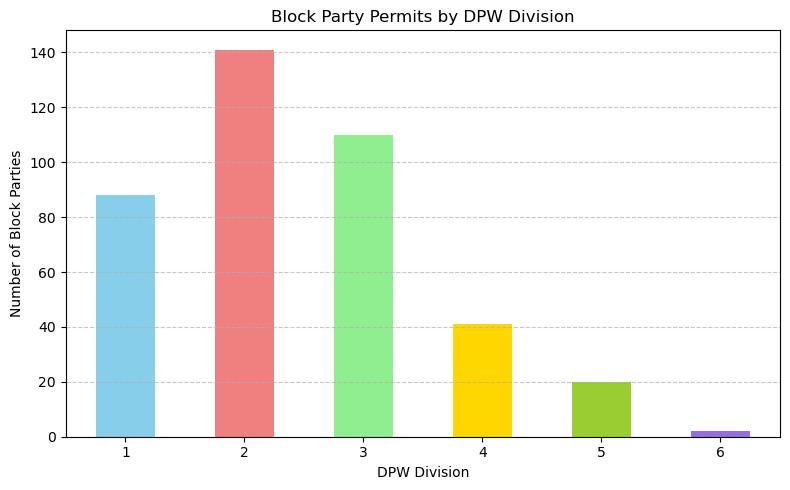

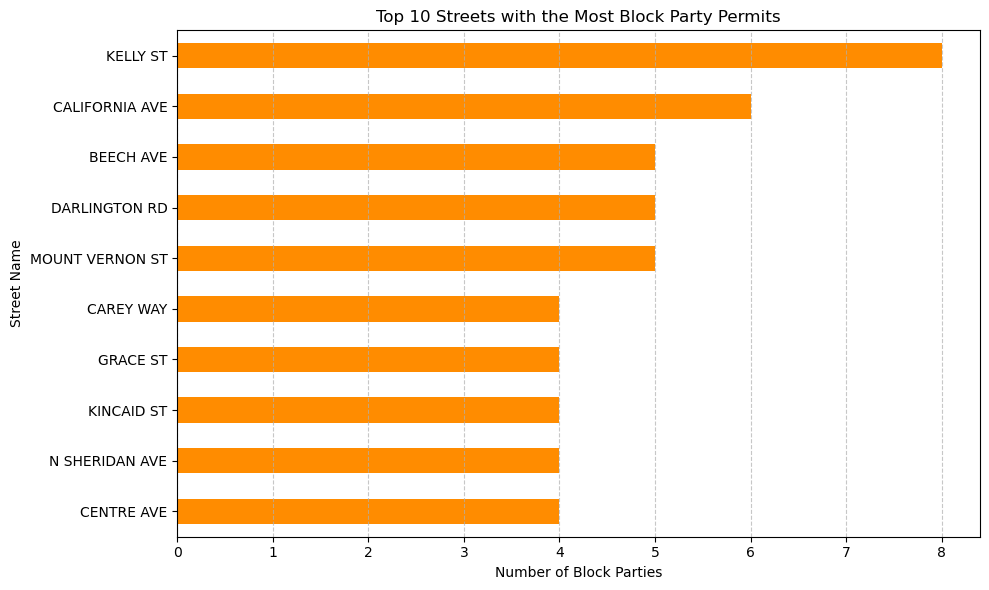


--- Consolidated Block Party Analysis---

1. Most Active Area by Division:
Division with Most Parties: Division 2 (141 parties)

2. Most Active Street:
Street with Most Parties: KELLY ST (8 parties)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# set the file name
file_name = "data.txt"

# load and read data, assumes 'data.txt' contains the CSV-formatted block party data 
#safety net
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. ")
    # Exits the script if the file isn't found
    exit()

#analysis 1

# drop rows with missing 'Division' data and convert the column to an integer type
df_division = df.dropna(subset=['Division']).copy()
df_division['Division'] = df_division['Division'].astype(int)

# count the number of permits for each Division
division_counts = df_division['Division'].value_counts().sort_values(ascending=False)
most_active_division = division_counts.nlargest(1)
least_active_division = division_counts.nsmallest(1)

# graph 1
plt.figure(figsize=(8, 5))
division_counts.sort_index().plot(
    kind='bar',
    color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'yellowgreen', 'mediumpurple']
)
plt.title('Block Party Permits by DPW Division')
plt.xlabel('DPW Division')
plt.ylabel('Number of Block Parties')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # displays the first graph

# analysis 2

# function to extract the street name from the 'Address' column
def extract_street_name(address):
    if pd.isna(address):
        return None
    # use regex to remove the leading building number(s) and any following space
    return re.sub(r'^\d+\s*', '', str(address).strip())

df['Street Name'] = df['Address'].apply(extract_street_name)

# count the number of permits for each extracted street name
street_counts = df['Street Name'].value_counts()
most_active_street = street_counts.nlargest(1)
top_10_streets = street_counts.nlargest(10)

# graph 2
plt.figure(figsize=(10, 6))
top_10_streets.sort_values(ascending=True).plot(kind='barh', color='darkorange')
plt.title('Top 10 Streets with the Most Block Party Permits')
plt.xlabel('Number of Block Parties')
plt.ylabel('Street Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # displays the second graph

print("\n--- Consolidated Block Party Analysis---")

print("\n1. Most Active Area by Division:")
print(f"Division with Most Parties: Division {most_active_division.index[0]} ({most_active_division.values[0]} parties)")

print("\n2. Most Active Street:")
print(f"Street with Most Parties: {most_active_street.index[0]} ({most_active_street.values[0]} parties)")

Kelly St. is in **Homewood South Pittsburgh**, making that the neighborhood with the most blockparties, thus making it the most fun. Who doesn't love a good block party. 

#### Submetric 3 : Number of Parks

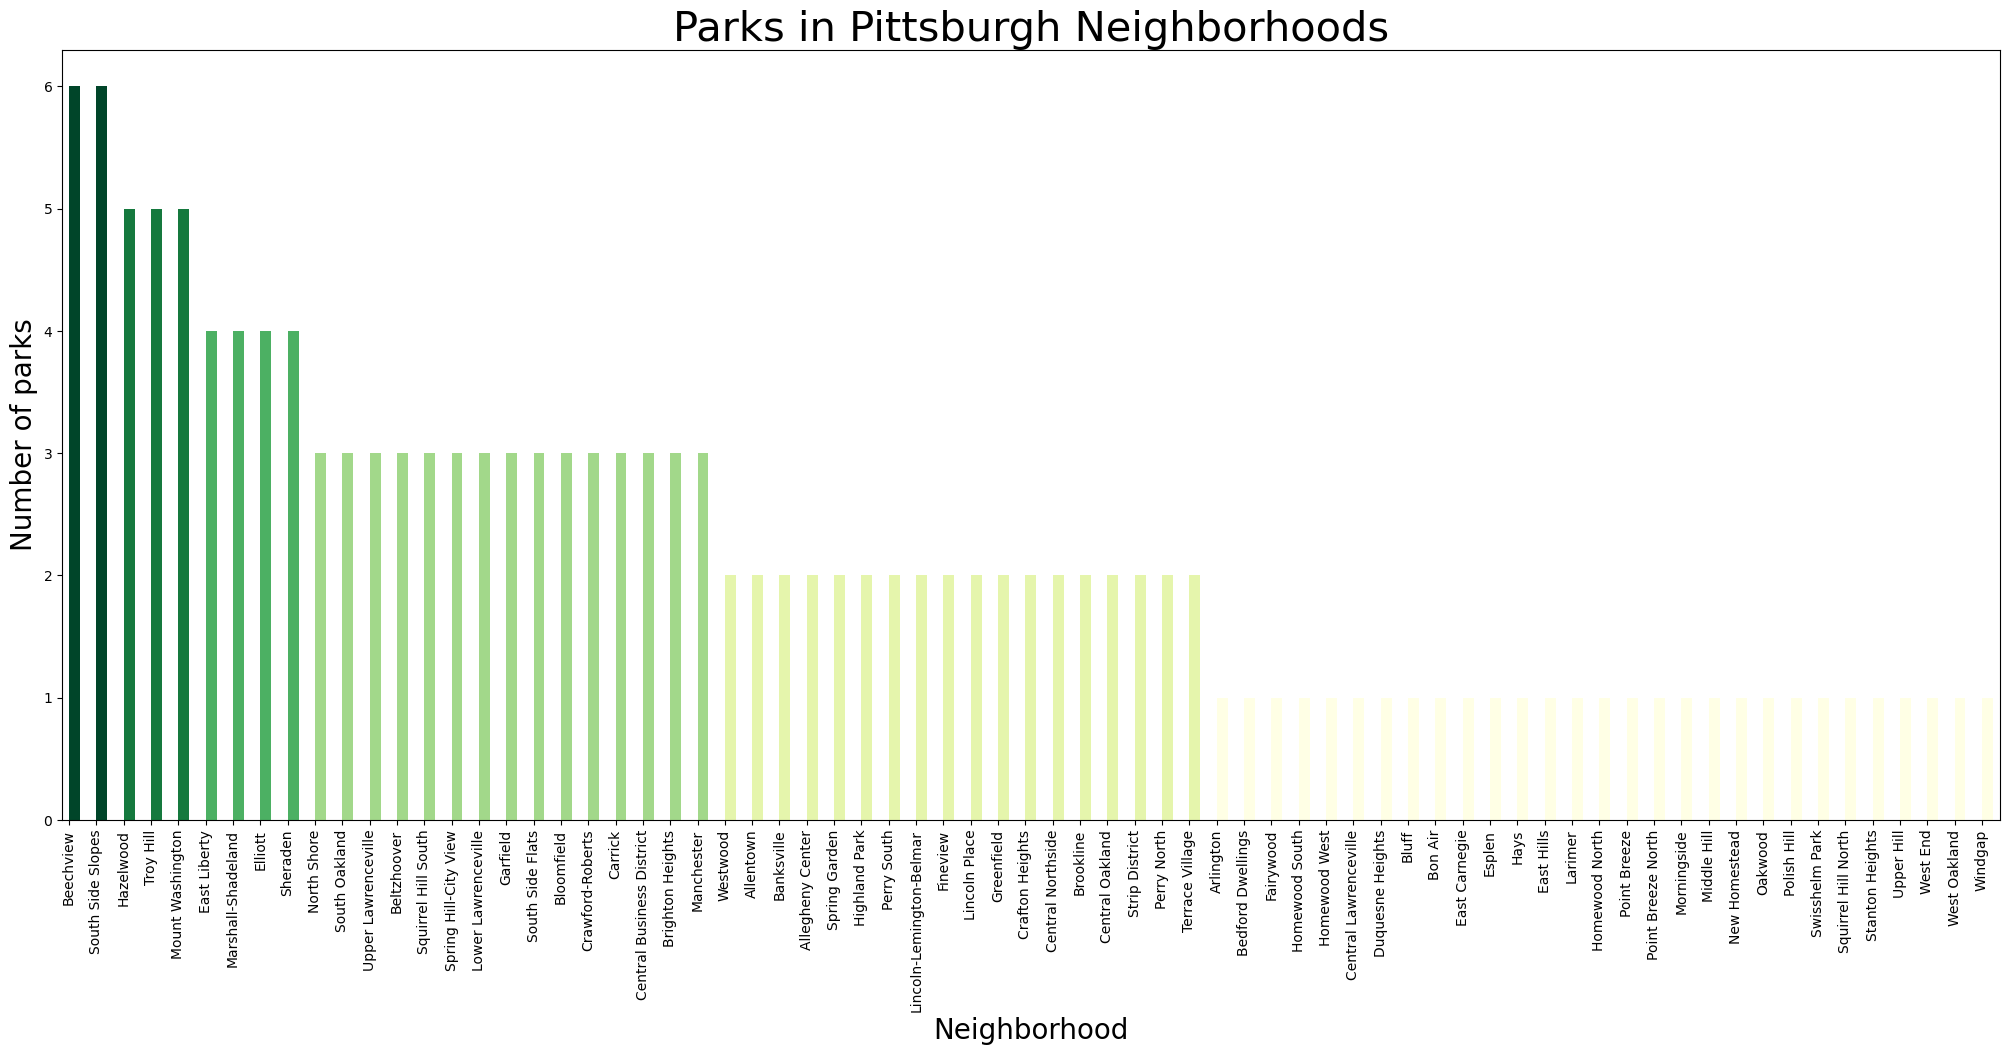

In [9]:
#importing in libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load in dataset csv
dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d", index_col = "_id")

dataset.head() #Display csv dataset in jupyterhub

parks = dataset[['name', 'type', 'neighborhood']] 
#create a new dataset using the original that only includes columns for name, type, and neighborhood

parks.sort_values(by="neighborhood").head(16) #Display first 16 rows of data from the new dataset

query_mask = parks['type'] == "Park" #Create a query mask to look for only parks
parks_only = parks[query_mask]

parks_rank = pd.DataFrame()
parks_rank["num_parks"] = parks_only.groupby("neighborhood").size() 
#create a column that describes the number of parks in each neighborhood

parks_sorted = parks_rank.sort_values(by=['num_parks'], ascending=False) #sort the data by # of parks 
parks_sorted.head() #Display data

#Add fun coloring to the bars based off of y-axis values
norm = plt.Normalize(np.min(parks_sorted["num_parks"]), np.max(parks_sorted["num_parks"])) #normalize bar values
colmap = plt.cm.YlGn #import colormap from matplotlib
colors = [colmap(norm(y)) for y in parks_sorted["num_parks"]] #apply colormap to bars based on value

parks_sorted['num_parks'].plot(kind="bar", width = .4, figsize=(25,10), position=0, color=colors) #plot data

plt.xlabel('Neighborhood', fontsize =20) #label x-axis as 'Neighborhood'
plt.ylabel('Number of parks', fontsize=20) #label y-axis as 'Number of parks'
plt.title('Parks in Pittsburgh Neighborhoods', fontsize=30) #Add graph title

plt.show() #My graphs don't show up in jupyterlab unless I run this function for some reason lol


#### Submetric 4 : Number of Playgrounds

Dataset shape: (125, 18)

First few rows:


,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/playgrounds/Able_Long_Playground.jpg,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/playgrounds/Albert_Graham_Playground.jpg,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/playgrounds/Alpine_Playground.jpg,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/playgrounds/Alton_Playground.jpg,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/playgrounds/Ammon_Playground.jpg,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


Neighborhood with most playgrounds: Squirrel Hill South - 8


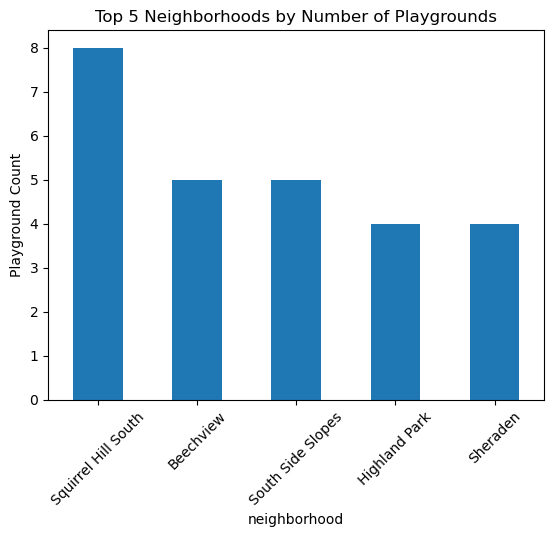

Most commonly occuring public works division: 3

Neighborhoods with playgrounds in this division:
- Crawford-Roberts
- Bedford Dwellings
- South Side Slopes
- South Side Flats
- Central Oakland
- Hazelwood
- Squirrel Hill South
- West Oakland
- Regent Square
- Greenfield
- South Oakland
- Hays
- Terrace Village
- Carrick
- Lincoln Place
- Upper Hill
- New Homestead
- Swisshelm Park
- Bluff
- Middle Hill
- Squirrel Hill North


In [10]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

resource_id = "47350364-44a8-4d15-b6e0-5f79ddff9367"
playgrounds_url = f"https://data.wprdc.org/datastore/dump/{resource_id}"

playgrounds_data = pd.read_csv(playgrounds_url, sep=",", engine="python")

print("Dataset shape:", playgrounds_data.shape)
print("\nFirst few rows:")
display(playgrounds_data.head())

url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"
data = pd.read_csv(url)

top5 = data["neighborhood"].value_counts().head(5)

print("Neighborhood with most playgrounds:", top5.idxmax(), "-", top5.max())

top5.plot(kind="bar")
plt.title("Top 5 Neighborhoods by Number of Playgrounds")
plt.ylabel("Playground Count")
plt.xticks(rotation=45)
plt.show()

url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"
data = pd.read_csv(url)

most_common_division = data["public_works_division"].value_counts().idxmax()
print("Most commonly occuring public works division:", most_common_division)

neighborhoods = data[data["public_works_division"] == most_common_division]["neighborhood"].unique()

print("\nNeighborhoods with playgrounds in this division:")
for n in neighborhoods:
    print("-", n)

## Conclusion

**Submetric Summary**: Homewood South was the most fun neighborhood as measured by having the most block parties. Squirrel Hill South had the most playgrounds. Saint Clair was the safest neighborhood, as measured by having the least amount of crime. Beechview and Southside Slopes had the most parks. 

Across the board, we found that our subjective favorite neighborhood was not necessarily the 'best' according to our submetrics. Combining the different submetrics was difficult, since we all got different neighborhoods as the 'best' within our individual submetrics. 

After looking at all of our individual analyses together, we decided that **Beechview** was the 'best' for touching grass. It had a high ranking on 2 of our data sets, being in 1st for number of parks and 2nd for number of playgrounds. Although Squirrel Hill South was also ranked high across the different submetrics, having the 3rd most fun blockparty street in Pittsburgh, 1st for number of playgrounds, and tied for 3rd for number of parks, it was also in the top 10 most dangerous neighborhoods. Although Beechview is not within the top 10 safest neighborhoods, it does not lie within the top 10 most dangerous neighborhoods so we feel comfortable naming it as our winner.  